**Chat with document**

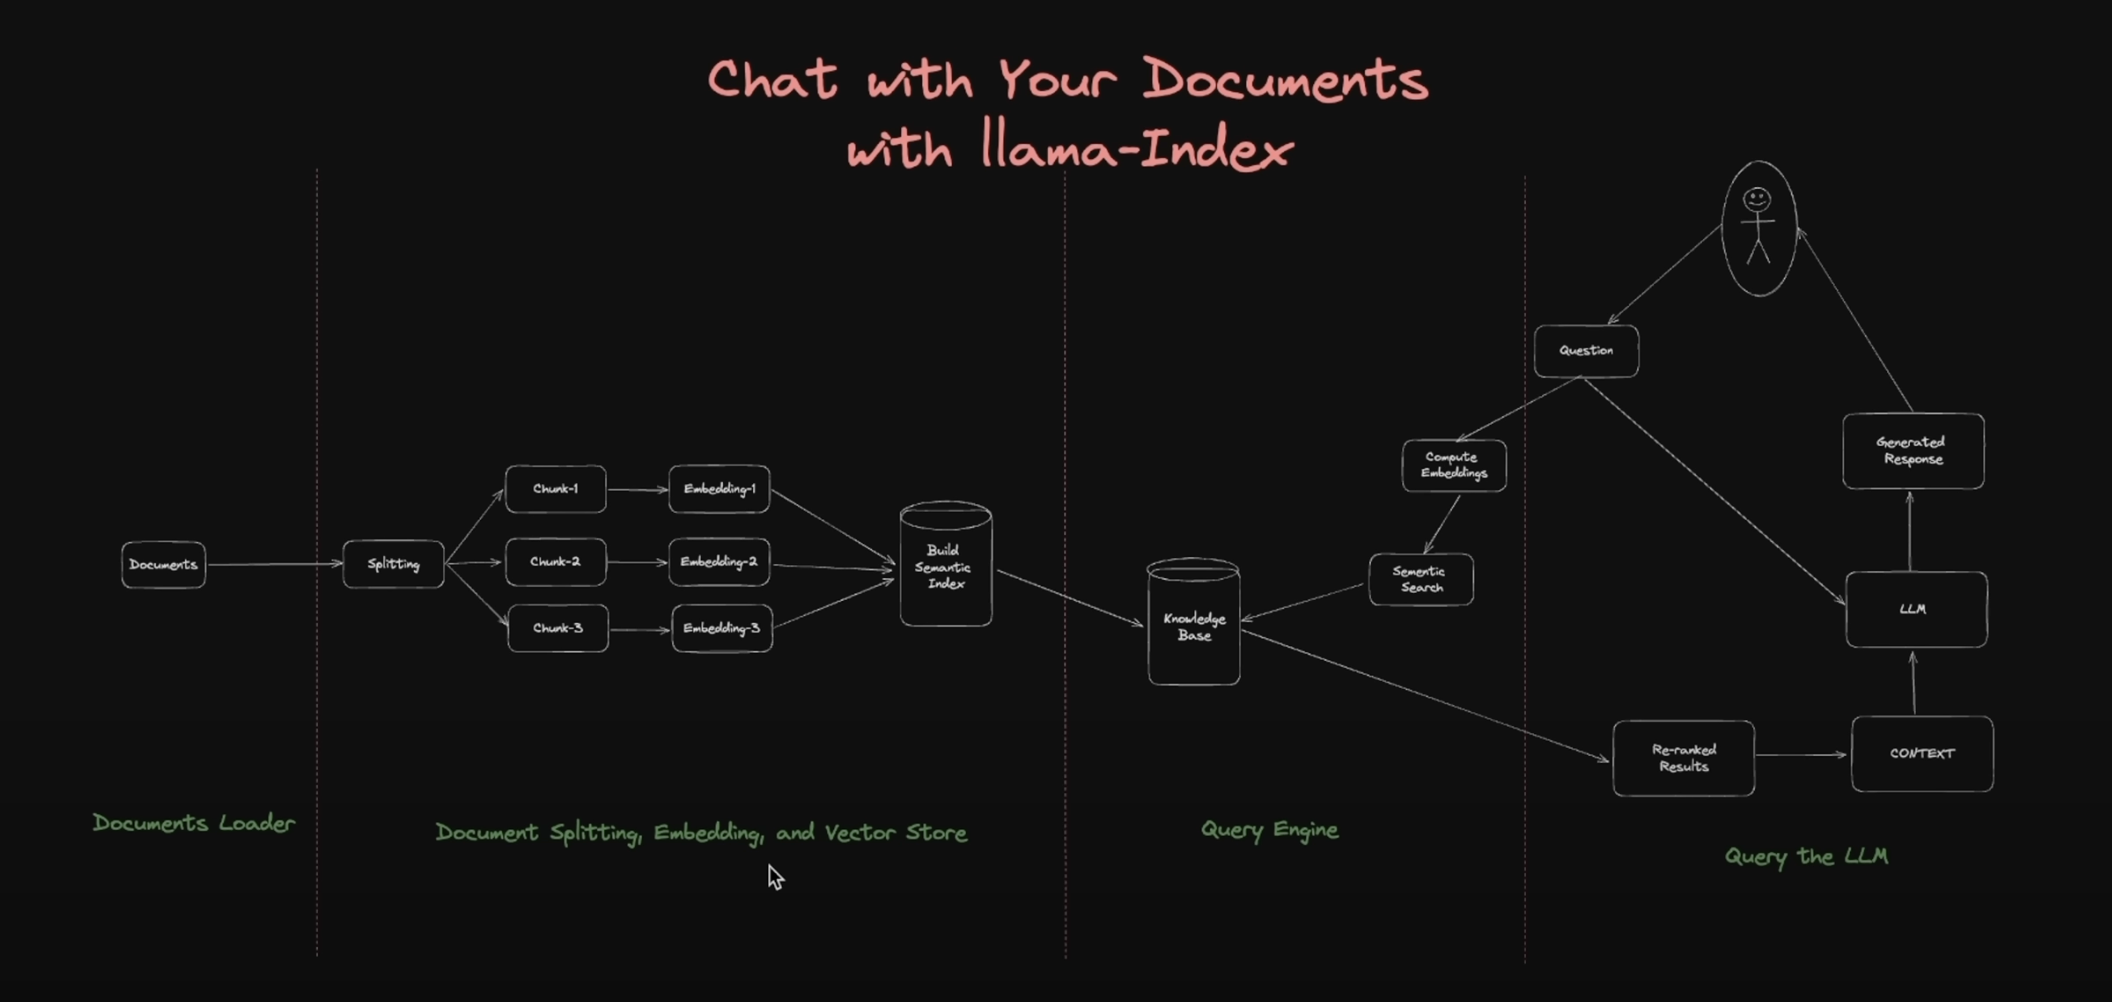

In [1]:
!pip install --quiet llama-index openai accelerate

In [2]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# Langchain and LlamaIndex

**Langchain steps for RAG**:
```
1. Load Document.
2. Chunk Document.
3. Create Embeddings.
4. Create Vector Store.
5. Create Retriever Index.
6. Query (Chain).
```

**Llamaindex steps for RAG**:
```
1. Load Document.
2. Create Retriever Index.
3. Query.
```

# 1. Starter Tutorial

[Tutorial](https://docs.llamaindex.ai/en/stable/getting_started/starter_example.html#starter-tutorial)

In [3]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

# Load documents.

In [4]:
dir_path = '/content/data'
documents = SimpleDirectoryReader(dir_path).load_data()

In [5]:
# documents

# Vector Store

In [6]:
index = VectorStoreIndex.from_documents(documents=documents)

In [7]:
index

# Querying

```
1. Query Engine.
2. Chat Engine.
```

[Chat Engine](https://docs.llamaindex.ai/en/stable/module_guides/deploying/chat_engines/root.html)

# Query Engine

In [8]:
query_engine = index.as_query_engine()

In [9]:
response = query_engine.query("What is yolo world?")
print(response)

YOLO-World is a cutting-edge real-time open-vocabulary object detector that enhances YOLO with open-vocabulary detection capabilities through vision-language modeling and pre-training on large-scale datasets. It introduces a new Re-parameterizable Vision-Language Path Aggregation Network (RepVL-PAN) and region-text contrastive loss to facilitate the interaction between visual and linguistic information, excelling in detecting a wide range of objects in a zero-shot manner with high efficiency.


# Chat Engine.

In [10]:
chat_engine = index.as_chat_engine()

In [11]:
response = chat_engine.chat("What is yolo world?")
print(response)

YOLO-World is a cutting-edge real-time open-vocabulary object detector that enhances YOLO with open-vocabulary detection capabilities through vision-language modeling and pre-training on large-scale datasets. It introduces a new Re-parameterizable Vision-Language Path Aggregation Network (RepVL-PAN) and region-text contrastive loss to facilitate the interaction between visual and linguistic information, excelling in detecting a wide range of objects in a zero-shot manner with high efficiency.


In [12]:
response = chat_engine.chat("Who built that?")
print(response)

Cheng, Tianheng, Song, Lin, Ge, Yixiao, Liu, Wenyu, Wang, Xinggang, and Shan, Ying built YOLO-World.


In [13]:
response = chat_engine.chat("What does it do?")
print(response)

YOLO-World enhances YOLO with open-vocabulary detection capabilities through vision-language modeling and pre-training on large-scale datasets. It introduces a new Re-parameterizable Vision-Language Path Aggregation Network (RepVL-PAN) and region-text contrastive loss to facilitate the interaction between visual and linguistic information. YOLO-World excels in detecting a wide range of objects in a zero-shot manner with high efficiency, achieving notable performance on various tasks such as object detection and open-vocabulary instance segmentation.


# 2. Storing and Loading data.

[Using Vector Stores](https://docs.llamaindex.ai/en/stable/understanding/storing/storing.html)


[Vector Stores](https://docs.llamaindex.ai/en/stable/module_guides/storing/vector_stores.html)

In [14]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage

In [15]:
# check if the storage already exist
PERSIST_DIR = 'storage'

if not os.path.exists(PERSIST_DIR):
  documents = SimpleDirectoryReader(dir_path).load_data()
  index = VectorStoreIndex.from_documents(documents=documents)

  # Store it for later use
  index.storage_context.persist(persist_dir=PERSIST_DIR)

else:
  # load the existing directory
  storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
  index = load_index_from_storage(storage_context=storage_context)

In [16]:
chat_engine = index.as_chat_engine()

In [17]:
response = chat_engine.chat("Who built yolo world?")

In [18]:
response

AgentChatResponse(response='Joseph Redmon and Ali Farhadi built YOLO World.', sources=[ToolOutput(content='Joseph Redmon and Ali Farhadi built YOLO World.', tool_name='query_engine_tool', raw_input={'input': 'Who built YOLO World?'}, raw_output=Response(response='Joseph Redmon and Ali Farhadi built YOLO World.', source_nodes=[NodeWithScore(node=TextNode(id_='8fa3c3bc-7e2a-4274-a51b-a016a8b6e2a0', embedding=None, metadata={'page_label': '12', 'file_name': '/content/data/yolov9.pdf', 'file_path': '/content/data/yolov9.pdf', 'file_type': 'application/pdf', 'file_size': 4968643, 'creation_date': '2024-03-07', 'last_modified_date': '2024-03-07'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='901b086f-e9fd-492b

In [19]:
from llama_index.core.response.pprint_utils import pprint_response
pprint_response(response, show_source = True)

Final Response: Joseph Redmon and Ali Farhadi built YOLO World.
______________________________________________________________________
Source Node 1/2
Node ID: 8fa3c3bc-7e2a-4274-a51b-a016a8b6e2a0
Similarity: 0.7542784167793148
Text: 1 [47] Joseph Redmon, Santosh Divvala, Ross Girshick, and Ali
Farhadi. You only look once: Unified, real-time object detec- tion. In
Proceedings of the IEEE/CVF Conference on Com- puter Vision and
Pattern Recognition (CVPR) , pages 779– 788, 2016. 3 [48] Joseph
Redmon and Ali Farhadi. YOLO9000: better, faster, stronger. In
Proceedings of the IEE...
______________________________________________________________________
Source Node 2/2
Node ID: 542703b1-2341-4abb-a740-023fe865eb85
Similarity: 0.7530881912060917
Text: We used the MS COCO dataset to conduct experiments, and the
experimental results verified that our proposed YOLOv9 achieved the
top perfor- mance in all comparisons. We summarize the contributions
of this paper as follows: 1. We theoretically an

In [20]:
response = chat_engine.chat("Who built yolo 9?")
pprint_response(response=response, show_source = True)

Final Response: Joseph Redmon and Ali Farhadi built YOLOv9.
______________________________________________________________________
Source Node 1/2
Node ID: 542703b1-2341-4abb-a740-023fe865eb85
Similarity: 0.7985192774158095
Text: We used the MS COCO dataset to conduct experiments, and the
experimental results verified that our proposed YOLOv9 achieved the
top perfor- mance in all comparisons. We summarize the contributions
of this paper as follows: 1. We theoretically analyzed the existing
deep neural net- work architecture from the perspective of reversible
function, an...
______________________________________________________________________
Source Node 2/2
Node ID: 8fa3c3bc-7e2a-4274-a51b-a016a8b6e2a0
Similarity: 0.7958544369037326
Text: 1 [47] Joseph Redmon, Santosh Divvala, Ross Girshick, and Ali
Farhadi. You only look once: Unified, real-time object detec- tion. In
Proceedings of the IEEE/CVF Conference on Com- puter Vision and
Pattern Recognition (CVPR) , pages 779– 788, 2016. 3

In [21]:
response = chat_engine.chat("What is the difference between yolo world and yolo v9?")
pprint_response(response=response, show_source = True)

Final Response: Here is the information I found:  - YOLO World is not
explicitly mentioned in the provided context information. - YOLOv9 is
a proposed real-time object detector that has shown significant
improvements compared to existing methods. It has fewer parameters and
calculations than some previous models while achieving better Average
Precision (AP) in detection tasks. - The differences between YOLO
World and YOLOv9 include:   - YOLOv9 has about 10% fewer parameters
and 5-15% fewer calculations compared to YOLO World.   - YOLOv9 shows
a 0.4-0.6% improvement in Average Precision (AP) compared to YOLO
World. - Both YOLO World and YOLOv9 are real-time object detectors
that have been compared with other models in terms of parameters,
calculations, and average precision (AP).
______________________________________________________________________
Source Node 1/8
Node ID: 8fa3c3bc-7e2a-4274-a51b-a016a8b6e2a0
Similarity: 0.7922777533301919
Text: 1 [47] Joseph Redmon, Santosh Divvala, R

# 3. Configuring Settings
[Settings](https://docs.llamaindex.ai/en/stable/module_guides/supporting_modules/settings.html)

The Settings is a bundle of commonly used resources used during the indexing and querying stage in a LlamaIndex pipeline/application.

You can use it to set the global configuration. Local configurations (transformations, LLMs, embedding models) can be passed directly into the interfaces that make use of them.

The Settings is a simple singleton object that lives throughout your application. Whenever a particular component is not provided, the Settings object is used to provide it as a global default.

In [22]:
import os
from google.colab import userdata


os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [23]:
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Settings
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

In [24]:
Settings.text_splitter = SentenceSplitter(chunk_size = 10000, chunk_overlap=250)
Settings.llm = OpenAI(temperature=0) # LLM
Settings.embed_model = OpenAIEmbedding() # Embeddings

In [25]:
documents = SimpleDirectoryReader(dir_path).load_data()
index = VectorStoreIndex.from_documents(documents)

In [26]:
chat_engine = index.as_chat_engine()

In [27]:
from llama_index.core.response.pprint_utils import pprint_response
response = chat_engine.chat('What is yolo world')
pprint_response(response=response, show_source = True)

Final Response: YOLO-World is an innovative approach that enhances
YOLO with open-vocabulary detection capabilities through vision-
language modeling and pre-training on large-scale datasets. It
introduces a new Re-parameterizable Vision-Language Path Aggregation
Network (RepVL-PAN) and region-text contrastive loss to facilitate the
interaction between visual and linguistic information. YOLO-World
excels in detecting a wide range of objects in a zero-shot manner with
high efficiency, achieving notable performance on various tasks like
object detection and open-vocabulary instance segmentation.
______________________________________________________________________
Source Node 1/2
Node ID: 6245699e-2d58-48b6-ba38-ec041d8d7400
Similarity: 0.8246421471824081
Text: Abstract  The You Only Look Once (YOLO) series of detectors have
established themselves as efficient and practical tools. However,
their reliance on predefined and trained object categories limits
their applicability in open scen

In [28]:
response = chat_engine.chat("What is the difference between yolo world and yolo v9")
pprint_response(response=response, show_source = True)

Final Response: The main difference between YOLO-World and YOLOv9 is
as follows:  - YOLO-World is an innovative approach that enhances YOLO
with open-vocabulary detection capabilities through vision-language
modeling and pre-training on large-scale datasets. It introduces a new
Re-parameterizable Vision-Language Path Aggregation Network (RepVL-
PAN) and region-text contrastive loss to facilitate the interaction
between visual and linguistic information. YOLO-World excels in
detecting a wide range of objects in a zero-shot manner with high
efficiency, achieving notable performance on various tasks such as
object detection and open-vocabulary instance segmentation.  - YOLOv9
is a proposed real-time object detector that has been introduced as an
improvement over existing methods. It is highlighted for its
performance in terms of parameters, calculations, and average
precision (AP) compared to other models like YOLO MS-S, YOLO MS,
YOLOv7 AF, and YOLOv8-X. The YOLOv9 model shows enhancement

In [30]:
response = chat_engine.chat('Can you provide me a difference betwwen yolo-world vs Yolov9 and yolov8')
pprint_response(response = response, show_source = True)

Final Response: Here are the differences between YOLO-World, YOLOv9,
and YOLOv8:  - YOLO-World is an innovative approach that enhances YOLO
with open-vocabulary detection capabilities through vision-language
modeling and pre-training on large-scale datasets. It introduces a new
Re-parameterizable Vision-Language Path Aggregation Network (RepVL-
PAN) and region-text contrastive loss to facilitate the interaction
between visual and linguistic information. YOLO-World excels in
detecting a wide range of objects in a zero-shot manner with high
efficiency, achieving notable performance on various tasks such as
object detection and open-vocabulary instance segmentation.  - YOLOv9
is a proposed real-time object detector that has been introduced as an
improvement over existing methods. It is highlighted for its
performance in terms of parameters, calculations, and average
precision (AP) compared to other state-of-the-art object detectors.  -
YOLOv8 is a cutting-edge, state-of-the-art (SOTA) mod

# Service Context.

We can also change the LLMS and other settings using ServiceContext.

The service context container is a utility container for LlamaIndex index and query classes. The container contains the following objects that are commonly used for configuring every index and query, such as the LLM, the PromptHelper (for configuring input size/chunk size), the BaseEmbedding (for configuring the embedding model), and more.

In [34]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.core import ServiceContext
from llama_index.core import set_global_service_context

In [35]:
llm = OpenAI(temperature=0)
service_context = ServiceContext.from_defaults(llm = llm,
                                               chunk_size = 1024,
                                               chunk_overlap = 250)

<ipython-input-35-ca5c71339050>:2: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(llm = llm,


In [36]:
set_global_service_context(service_context)

In [37]:
documents = SimpleDirectoryReader(dir_path).load_data()

In [38]:
index = VectorStoreIndex.from_documents(documents=documents)

In [39]:
chat_engine = index.as_chat_engine()

In [40]:
from llama_index.core.response import pprint_utils
response = chat_engine.chat("What is yolov8")
pprint_response(response=response, show_source=True)

Final Response: YOLOv8 is a cutting-edge, state-of-the-art (SOTA)
model that builds upon the success of previous YOLO versions. It
introduces new features and improvements to further boost performance
and flexibility, designed to be fast, accurate, and easy to use for
various tasks such as object detection and tracking, instance
segmentation, image classification, and pose estimation.
______________________________________________________________________
Source Node 1/2
Node ID: dd194d0b-99da-4089-b943-7ddbf965b88f
Similarity: 0.8309223601244143
Text: Yolo v8  Ultralytics YOLOv8 is a cutting-edge, state-of-the-art
(SOTA) model that builds upon the success of previous YOLO versions
and introduces new features and improvements to further boost
performance and flexibility. YOLOv8 is designed to be fast, accurate,
and easy to use, making it an excellent choice for a wide range of
object detection...
______________________________________________________________________
Source Node 2/2
Node